In [107]:
import stanfordnlp
#stanfordnlp.download('en')   # This downloads the English models for the neural pipeline
# IMPORTANT: The above line prompts you before downloading, which doesn't work well in a Jupyter notebook.
# To avoid a prompt when using notebooks, instead use: >>> stanfordnlp.download('en', force=True)
nlp = stanfordnlp.Pipeline()
#nlp = stanfordnlp.Pipeline() # This sets up a default neural pipeline in English

doc.sentences[0].dependencies

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/home/amifaraj/stanfordnlp_resources/en_ew

[(<Word index=3;text=staff;lemma=staff;upos=NOUN;xpos=NN;feats=Number=Sing;governor=9;dependency_relation=nsubj>,
  'det',
  <Word index=1;text=The;lemma=the;upos=DET;xpos=DT;feats=Definite=Def|PronType=Art;governor=3;dependency_relation=det>),
 (<Word index=3;text=staff;lemma=staff;upos=NOUN;xpos=NN;feats=Number=Sing;governor=9;dependency_relation=nsubj>,
  'compound',
  <Word index=2;text=hotel;lemma=hotel;upos=NOUN;xpos=NN;feats=Number=Sing;governor=3;dependency_relation=compound>),
 (<Word index=9;text=friendly;lemma=friendly;upos=ADJ;xpos=JJ;feats=Degree=Pos;governor=0;dependency_relation=root>,
  'nsubj',
  <Word index=3;text=staff;lemma=staff;upos=NOUN;xpos=NN;feats=Number=Sing;governor=9;dependency_relation=nsubj>),
 (<Word index=5;text=owner;lemma=owner;upos=NOUN;xpos=NN;feats=Number=Sing;governor=3;dependency_relation=conj>,
  'cc',
  <Word index=4;text=and;lemma=and;upos=CCONJ;xpos=CC;feats=_;governor=5;dependency_relation=cc>),
 (<Word index=3;text=staff;lemma=staff;upos=NO

In [66]:

text = "Barack Obama was born in Hawaii.  He was a good person."
text.posTag(0)

AttributeError: 'str' object has no attribute 'posTag'

In [57]:
dependency_parse = doc.sentences[0].parseTree

AttributeError: 'Sentence' object has no attribute 'parseTree'

In [33]:
#from nltk.parse.stanford import StanfordDependencyParser
import stanfordnlp
from stanfordnlp import StanfordCoreNLP
path_to_jar = 'stanford-corenlp-full-2018-10-05.zip'
path_to_models_jar = 'stanford-english-kbp-corenlp-2018-10-05-models.jar'

dependency_parser = StanfordCoreNLP(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

result = dependency_parser.raw_parse('I shot an elephant in my sleep')
dep = result.next()

list(dep.triples())

ImportError: cannot import name 'StanfordCoreNLP' from 'stanfordnlp' (/home/amifaraj/anaconda3/lib/python3.7/site-packages/stanfordnlp/__init__.py)

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/amifaraj/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [46]:
doc = nlp("Barack Obama was born in Hawaii.  He was a good person.")
d = doc.sentences[1].print_dependencies()

('He', '5', 'nsubj')
('was', '5', 'cop')
('a', '5', 'det')
('good', '5', 'amod')
('person', '0', 'root')
('.', '5', 'punct')


In [44]:
from nltk import pos_tag
from nltk import RegexpParser
text ="Barack Obama was born in Hawaii.".split()
#print("After Split:",text)
tokens_tag = pos_tag(text)
print("After Token:",tokens_tag)
#patterns= """mychunk:{<NN.?>*<VBD.?>*<JJ.?>*<CC>?}"""
#chunker = RegexpParser(patterns)
#print("After Regex:",chunker)
#output = chunker.parse(tokens_tag)
#print("After Chunking",output)

After Token: [('Barack', 'NNP'), ('Obama', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Hawaii.', 'NNP')]


In [234]:
import pandas as pd
text = "The hotel staff, manager and owner were not very friendly and supportive."
nltk_pos_tagged = pos_tag(text.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,The,DT
1,hotel,NN
2,"staff,",NN
3,manager,NN
4,and,CC
5,owner,NN
6,were,VBD
7,not,RB
8,very,RB
9,friendly,JJ


In [283]:
#import stanfordnlp
#nlp = stanfordnlp.Pipeline()
#nlp = stanfordnlp.Pipeline() # This sets up a default neural pipeline in English

#doc.sentences.dependencies
text = 'I consider the hotel staff rude'
doc = nlp(text)
df = pd.DataFrame(doc.sentences[0].dependencies, columns=['gov', 'rel', 'dep'])
df

,gov,rel,dep
0,<Word index=2;text=consider;lemma=consider;upo...,nsubj,<Word index=1;text=I;lemma=I;upos=PRON;xpos=PR...
1,<Word index=0;text=ROOT>,root,<Word index=2;text=consider;lemma=consider;upo...
2,<Word index=5;text=staff;lemma=staff;upos=NOUN...,det,<Word index=3;text=the;lemma=the;upos=DET;xpos...
3,<Word index=5;text=staff;lemma=staff;upos=NOUN...,compound,<Word index=4;text=hotel;lemma=hotel;upos=NOUN...
4,<Word index=2;text=consider;lemma=consider;upo...,obj,<Word index=5;text=staff;lemma=staff;upos=NOUN...
5,<Word index=2;text=consider;lemma=consider;upo...,xcomp,<Word index=6;text=rude;lemma=rude;upos=ADJ;xp...


In [262]:
#nounList=['staff']
nounList

['staff', 'manager', 'owner']

In [261]:
for d in range(0,len(df)):
    if df['rel'][d]=='conj' and df['gov'][d].lemma=='staff':
        nounList.append(df['dep'][d].lemma)
        

In [244]:
doc.sentences[0].dependencies

[(<Word index=3;text=staff;lemma=staff;upos=NOUN;xpos=NN;feats=Number=Sing;governor=11;dependency_relation=nsubj>,
  'det',
  <Word index=1;text=The;lemma=the;upos=DET;xpos=DT;feats=Definite=Def|PronType=Art;governor=3;dependency_relation=det>),
 (<Word index=3;text=staff;lemma=staff;upos=NOUN;xpos=NN;feats=Number=Sing;governor=11;dependency_relation=nsubj>,
  'compound',
  <Word index=2;text=hotel;lemma=hotel;upos=NOUN;xpos=NN;feats=Number=Sing;governor=3;dependency_relation=compound>),
 (<Word index=11;text=friendly;lemma=friendly;upos=ADJ;xpos=JJ;feats=Degree=Pos;governor=0;dependency_relation=root>,
  'nsubj',
  <Word index=3;text=staff;lemma=staff;upos=NOUN;xpos=NN;feats=Number=Sing;governor=11;dependency_relation=nsubj>),
 (<Word index=5;text=manager;lemma=manager;upos=NOUN;xpos=NN;feats=Number=Sing;governor=3;dependency_relation=conj>,
  'punct',
  <Word index=4;text=,;lemma=,;upos=PUNCT;xpos=,;feats=_;governor=5;dependency_relation=punct>),
 (<Word index=3;text=staff;lemma=staf

In [237]:
for i in range(0,len(doc.sentences[0].dependencies)):
    print(doc.sentences[0].dependencies[i][2].dependency_relation)

det
compound
nsubj
punct
conj
cc
conj
cop
advmod
advmod
root
cc
conj
punct


In [238]:
len(doc.sentences[0].dependencies)

14

In [267]:
for i in range(0,len(doc.sentences[0].dependencies)-1):
    print("gov: "+ str(doc.sentences[0].dependencies[i][0].upos))
    print(doc.sentences[0].dependencies[i][1]) 
    print("dep: "+ doc.sentences[0].dependencies[i][2].upos)
    print("****")               

gov: NOUN
det
dep: DET
****
gov: NOUN
compound
dep: NOUN
****
gov: ADJ
nsubj
dep: NOUN
****
gov: NOUN
punct
dep: PUNCT
****
gov: NOUN
conj
dep: NOUN
****
gov: NOUN
cc
dep: CCONJ
****
gov: NOUN
conj
dep: NOUN
****
gov: ADJ
cop
dep: AUX
****
gov: ADJ
advmod
dep: PART
****
gov: ADJ
advmod
dep: ADV
****
gov: None
root
dep: ADJ
****
gov: ADJ
cc
dep: CCONJ
****
gov: ADJ
conj
dep: ADJ
****


In [199]:
print(doc.sentences[0].dependencies[0][0].lemma)
print(doc.sentences[0].dependencies[0][1])
print(doc.sentences[0].dependencies[0][2].lemma)

hotel
det
the


In [79]:
patterns= """mychunk:{<nsubj.?>*<VBD.?>*<JJ.?>*<CC>?}"""
chunker = RegexpParser(patterns)
print("After Regex:",chunker)
#output = chunker.parse(tokens_tag)
#print("After Chunking",output)

After Regex: chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<nsubj.?>*<VBD.?>*<JJ.?>*<CC>?'>


In [88]:
doc = nlp("The hotel staff and owner were not very friendly.")

/home/amifaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPDependencyParser instead.
  


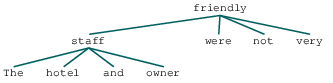

In [105]:
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='stanford/stanford-corenlp-3.9.2.jar',path_to_models_jar='stanford/stanford-corenlp-3.9.2-models.jar')    

result = list(sdp.raw_parse(text))  

# print the dependency tree
dep_tree = [parse.tree() for parse in result][0]
dep_tree

# visualize raw dependency tree
#from IPython.display import display
#display(dep_tree)


1. extractDependencies(Sentence)
2. getNounSiblings(d.dep)
3. getAdjectiveSiblings(d.gov)
4. isAffirmative(?)
5. isAdjective
6. isVerb
7. isNoun()
8. isPronoun()
9. getAdjectiveModifiers()
10. 

In [274]:
def extractDependencies(sentence):
    doc = nlp(sentence)
    dependency = doc.sentences[0].dependencies
    depTable = pd.DataFrame(dependency, columns=['gov', 'rel', 'dep'])
    return depTable

In [264]:
def getNounSibling(depTable, Col, row):
    noun = depTable[Col][row].lemma
    nounList=[noun]
    for index in range(0,len(depTable)):
        if depTable['rel'][index] =='conj' and depTable['gov'][index].lemma == noun:
            nounList.append(depTable['dep'][index].lemma)
    return nounList

In [266]:
def getAdjectiveSibling(depTable, Col, row):
    adj = depTable[Col][row].lemma
    adjList=[adj]
    for index in range(0,len(depTable)):
        if depTable['rel'][index] =='conj' and depTable['gov'][index].lemma == adj:
            adjList.append(depTable['dep'][index].lemma)
    return adjList

In [265]:
def getAdjectiveModifiers(depTable, Col, row):
    adj = depTable[Col][row].lemma
    adjmod=[]
    for index in range(0,len(depTable)):
        if depTable['rel'][index] =='advmod' and depTable['gov'][index].lemma == adj:
            adjmod.append(depTable['dep'][index].lemma)
    return adjmod

In [268]:
def isNoun(depTable, Col, row):
    POS = depTable[Col][row].upos
    if POS=='NOUN':
        return True
    return False

In [269]:
def isAdjective(depTable, Col, row):
    POS = depTable[Col][row].upos
    if POS=='ADJ':
        return True
    return False

In [270]:
def isVerb(depTable, Col, row):
    POS = depTable[Col][row].xpos
    if 'VB' in POS:
        return True
    return False

In [271]:
def isAderb(depTable, Col, row):
    POS = depTable[Col][row].xpos
    if 'RB' in POS:
        return True
    return False

In [272]:
import stanfordnlp
nlp = stanfordnlp.Pipeline()

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/home/amifaraj/stanfordnlp_resources/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/home/amifaraj/stanfordnlp_resources/en_ew

In [292]:
text = 'I do not think the hotel staff were friendly'
df = extractDependencies(text)
df

,gov,rel,dep
0,<Word index=4;text=think;lemma=think;upos=VERB...,nsubj,<Word index=1;text=I;lemma=I;upos=PRON;xpos=PR...
1,<Word index=4;text=think;lemma=think;upos=VERB...,aux,<Word index=2;text=do;lemma=do;upos=AUX;xpos=V...
2,<Word index=4;text=think;lemma=think;upos=VERB...,advmod,<Word index=3;text=not;lemma=not;upos=PART;xpo...
3,<Word index=0;text=ROOT>,root,<Word index=4;text=think;lemma=think;upos=VERB...
4,<Word index=7;text=staff;lemma=staff;upos=NOUN...,det,<Word index=5;text=the;lemma=the;upos=DET;xpos...
5,<Word index=7;text=staff;lemma=staff;upos=NOUN...,compound,<Word index=6;text=hotel;lemma=hotel;upos=NOUN...
6,<Word index=9;text=friendly;lemma=friendly;upo...,nsubj,<Word index=7;text=staff;lemma=staff;upos=NOUN...
7,<Word index=9;text=friendly;lemma=friendly;upo...,cop,<Word index=8;text=were;lemma=be;upos=AUX;xpos...
8,<Word index=4;text=think;lemma=think;upos=VERB...,ccomp,<Word index=9;text=friendly;lemma=friendly;upo...


True